In [1]:
# import necessary libraries
import os
import librosa
import librosa.display
import pandas as pd

In [2]:
# let's check whether all audios are mono and with same sampling rate

import os
from os import scandir

# create empty list to save details
# samplingRate stores sampling frequency of each audio
# audioName informs all the informations belongs to which audio
# audioDuration provides length of audios in seconds
# fileType will check the shape of the audio to confirm its type mono or stereo

audioName = []
samplingRate = []
audioDuration = []
fileType = []

dataset_path = "./recordings/"

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    for f in filenames:
            
            # load audio file
            file_path = os.path.join(dirpath, f)
            dirpath_components = file_path.split('/')
            fname = dirpath_components[-1]
            
            audioName.append(fname)
            
            # let's read audio with its sampling rate keeping sr = None, 
            # otherwise librosa will resample the audio to 22 KHz.
            # keeping mono = False will ensure that 
            # if any audio is stereo then it will get read as stereo.
            
            audio, sr = librosa.load(file_path,sr=None,mono=False)
            
            samplingRate.append(sr)
            
          #  fileSize.append(audio.shape)
            
            if len(audio.shape)>1:
                file_type = "stereo"
                duration = sr/audio.shape[1]
            else:
                file_type = "mono"
                duration = sr/audio.shape[0]
                
            fileType.append(file_type)
            
            audioDuration.append(duration) 

# gather all information together in dataframe             
df = pd.DataFrame({'audio_name':audioName, 'sampling_rate':samplingRate, 
                   'file_type':fileType, 'audio_duration':audioDuration})
# can save this dataframe in csv format
#df.to_csv(r'audio_info.csv',sep=',',header=True)

In [3]:
df.head()

,audio_name,sampling_rate,file_type,audio_duration
0,0_george_0.wav,8000,mono,3.355705
1,0_george_1.wav,8000,mono,1.692405
2,0_george_10.wav,8000,mono,1.342732
3,0_george_11.wav,8000,mono,2.185195
4,0_george_12.wav,8000,mono,1.975309


In [4]:
# Checking file_type has unique values
(pd.unique(df['file_type']))

array(['mono'], dtype=object)

In [5]:
# Checking sampling_rate has unique values
(pd.unique(df['sampling_rate']))

array([8000], dtype=int64)

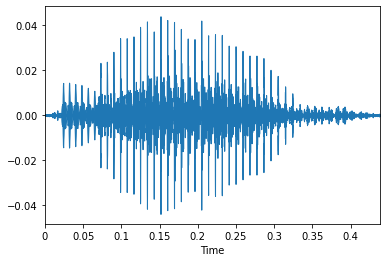

In [6]:
# let's plot audio signal (loaded the last one) using librosa's waveplot function
librosa.display.waveplot(audio, sr);